In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
flights_df = pd.read_csv('Avaiation sector Flights (project1).csv')


In [38]:
flights_df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [39]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

# 1. Punctuality Analysis

In [40]:
# Calculate average departure and arrival delays
avg_dep_delay = flights_df['dep_delay'].mean()
avg_arr_delay = flights_df['arr_delay'].mean()

# Identify airlines with their average departure and arrival delays
airline_punctuality = flights_df.groupby('name')[['dep_delay', 'arr_delay']].mean().sort_values(by='dep_delay')

avg_dep_delay, avg_arr_delay, airline_punctuality


(12.639070257304708,
 6.89537675731489,
                              dep_delay  arr_delay
 name                                             
 US Airways Inc.               3.782418   2.129595
 Hawaiian Airlines Inc.        4.900585  -6.915205
 Alaska Airlines Inc.          5.804775  -9.930889
 American Airlines Inc.        8.586016   0.364291
 Delta Air Lines Inc.          9.264505   1.644341
 Envoy Air                    10.552041  10.774733
 United Air Lines Inc.        12.106073   3.558011
 SkyWest Airlines Inc.        12.586207  11.931034
 Virgin America               12.869421   1.764464
 JetBlue Airways              13.022522   9.457973
 Endeavor Air Inc.            16.725769   7.379669
 Southwest Airlines Co.       17.711744   9.649120
 AirTran Airways Corporation  18.726075  20.115906
 Mesa Airlines Inc.           18.996330  15.556985
 ExpressJet Airlines Inc.     19.955390  15.796431
 Frontier Airlines Inc.       20.215543  21.920705)

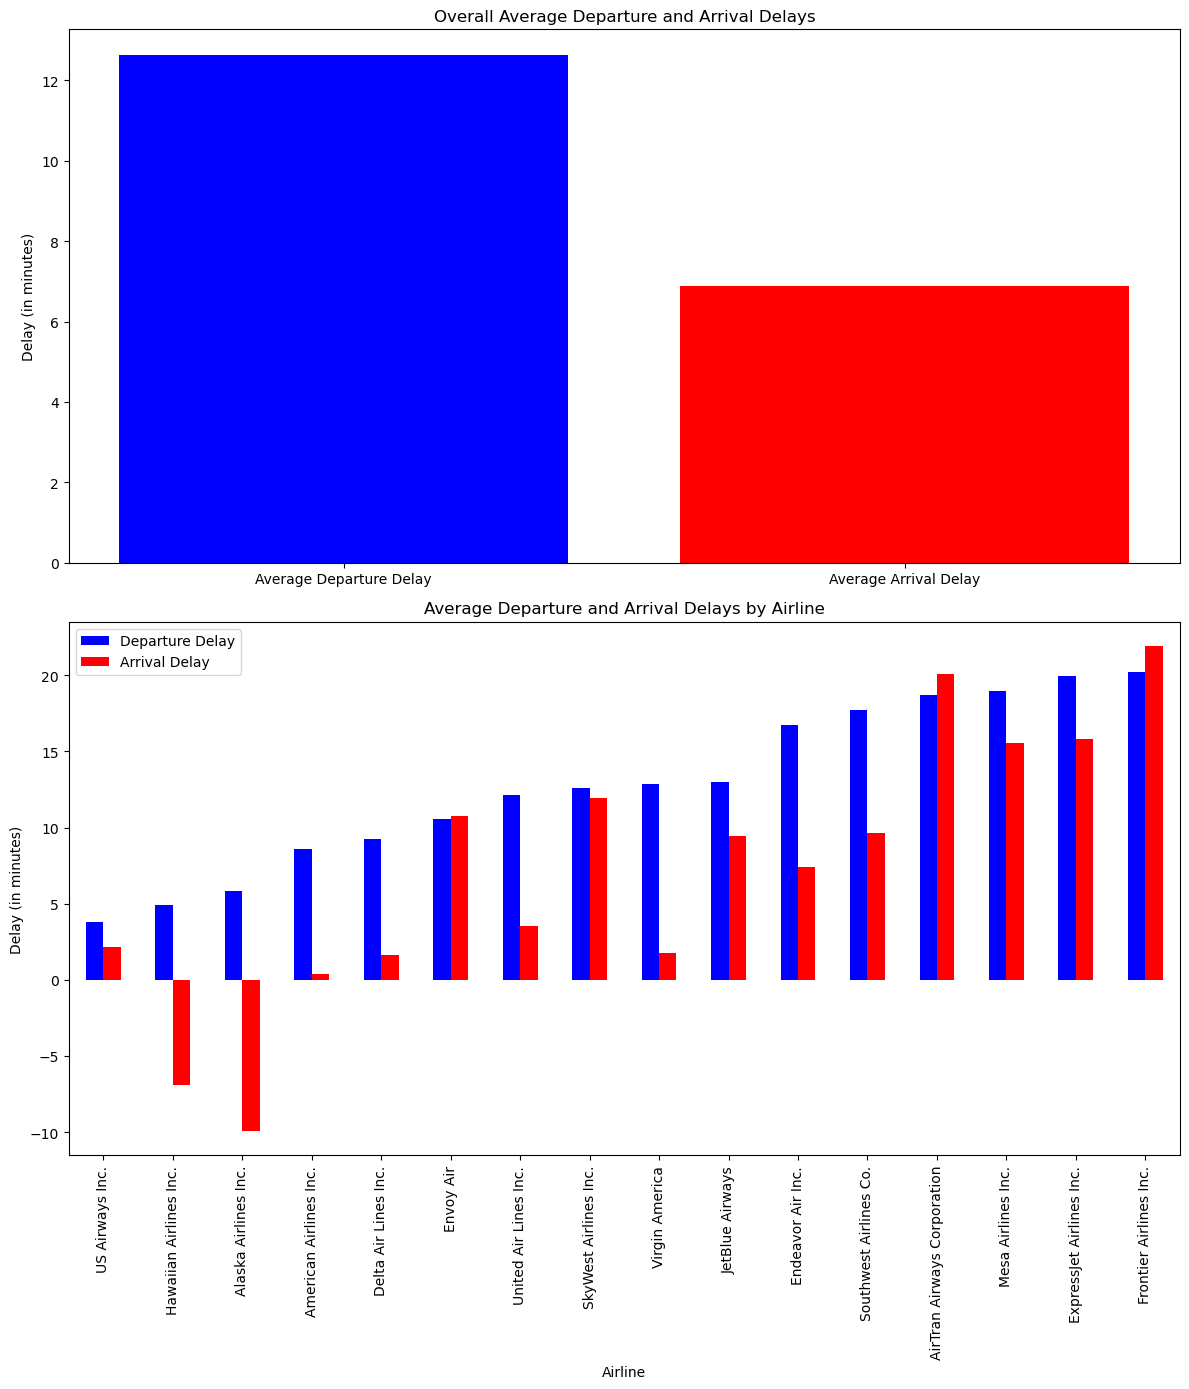

In [31]:
# Calculate average departure and arrival delays
avg_dep_delay = flights_df['dep_delay'].mean()
avg_arr_delay = flights_df['arr_delay'].mean()

# Identify airlines with their average departure and arrival delays
airline_punctuality = flights_df.groupby('name')[['dep_delay', 'arr_delay']].mean().sort_values(by='dep_delay')

# Visualization
fig, ax = plt.subplots(2, 1, figsize=(12, 14))

# Plotting overall average departure and arrival delays
ax[0].bar(['Average Departure Delay', 'Average Arrival Delay'], [avg_dep_delay, avg_arr_delay], color=['blue', 'red'])
ax[0].set_title('Overall Average Departure and Arrival Delays')
ax[0].set_ylabel('Delay (in minutes)')

# Plotting average delays for each airline
airline_punctuality.plot(kind='bar', ax=ax[1], color=['blue', 'red'])
ax[1].set_title('Average Departure and Arrival Delays by Airline')
ax[1].set_ylabel('Delay (in minutes)')
ax[1].set_xlabel('Airline')
ax[1].legend(["Departure Delay", "Arrival Delay"])

plt.tight_layout()
plt.show()


In [32]:
#Average Departure Delay: Approximately 12.64 minutes.
#Average Arrival Delay: Approximately 6.90 minutes.

# 2. Route Analysis

In [41]:
# Create a column to represent routes as "origin-dest"
flights_df['route'] = flights_df['origin'] + '-' + flights_df['dest']

# Find the most popular routes based on the number of flights
popular_routes = flights_df['route'].value_counts().head(10)

# Calculate total distance, airtime, and the number of flights for these routes
route_stats = flights_df.groupby('route').agg({'distance': 'mean', 'air_time': 'mean', 'flight': 'count'}).loc[popular_routes.index]

popular_routes, route_stats


(JFK-LAX    11262
 LGA-ATL    10263
 LGA-ORD     8857
 JFK-SFO     8204
 LGA-CLT     6168
 EWR-ORD     6100
 JFK-BOS     5898
 LGA-MIA     5781
 JFK-MCO     5464
 EWR-BOS     5327
 Name: route, dtype: int64,
          distance    air_time  flight
 JFK-LAX    2475.0  329.151089   11262
 LGA-ATL     762.0  113.555024   10263
 LGA-ORD     733.0  115.799812    8857
 JFK-SFO    2586.0  347.403626    8204
 LGA-CLT     544.0   86.669015    6168
 EWR-ORD     719.0  113.260295    6100
 JFK-BOS     187.0   38.481206    5898
 LGA-MIA    1096.0  154.148720    5781
 JFK-MCO     944.0  134.920427    5464
 EWR-BOS     200.0   40.312750    5327)

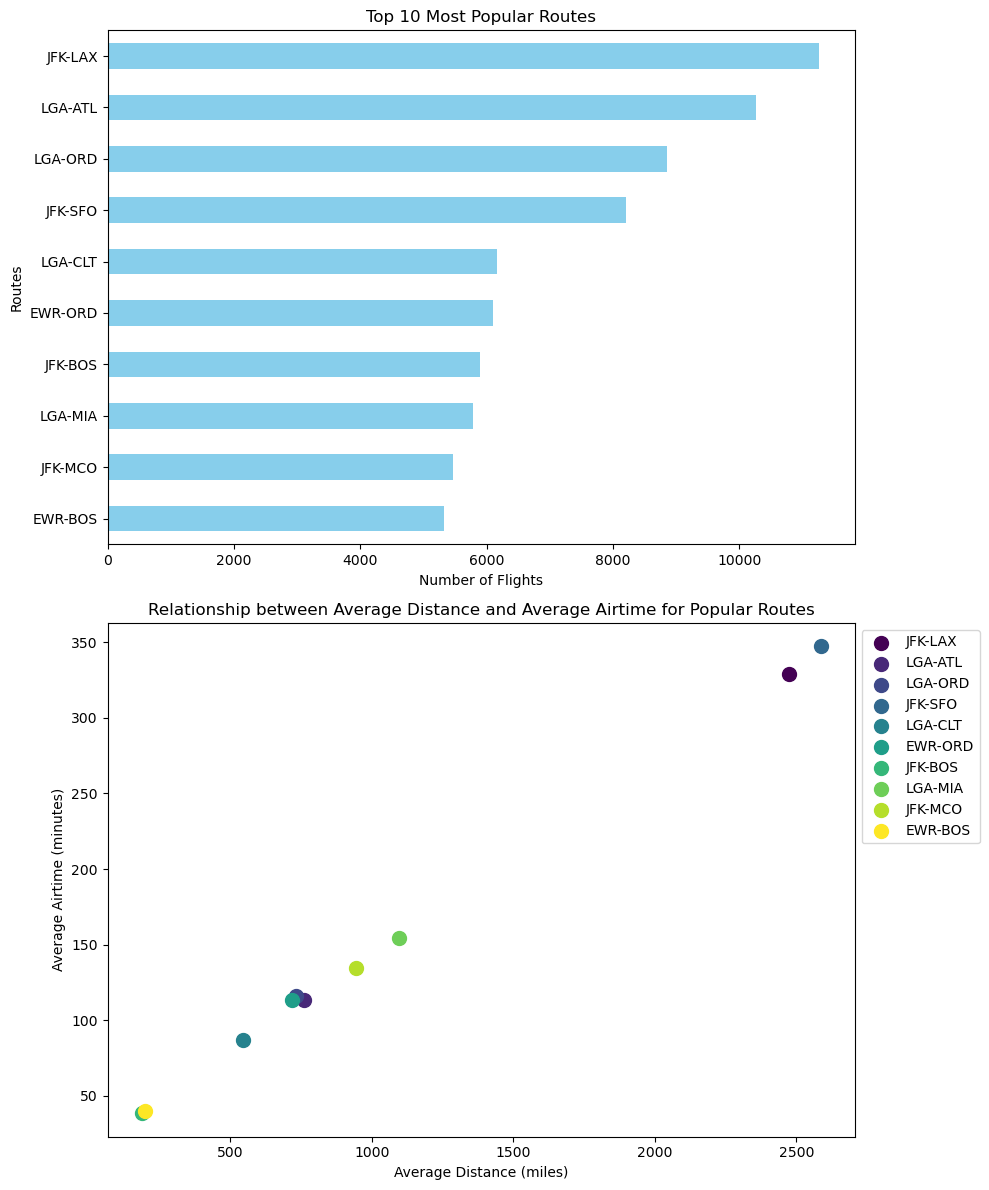

In [43]:
# Set up the figure and axes for both the bar chart and scatter plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Bar chart for the top 10 most popular routes
popular_routes.sort_values().plot(kind='barh', ax=ax1, color='skyblue')
ax1.set_title('Top 10 Most Popular Routes')
ax1.set_xlabel('Number of Flights')
ax1.set_ylabel('Routes')

# Scatter plot for the relationship between average distance and average airtime with distinct colors
# Use the same colors setup as before
colors = plt.cm.viridis(np.linspace(0, 1, len(route_stats.index)))

for i, route in enumerate(route_stats.index):
    ax2.scatter(route_stats.loc[route, 'distance'], 
                route_stats.loc[route, 'air_time'], 
                label=route, 
                s=100, 
                color=colors[i])
    
ax2.set_title('Relationship between Average Distance and Average Airtime for Popular Routes')
ax2.set_xlabel('Average Distance (miles)')
ax2.set_ylabel('Average Airtime (minutes)')
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


# 3. Aircraft Analysis


In [45]:
# Frequency of use of different aircraft (tailnum)
aircraft_frequency = flights_df['tailnum'].value_counts().head(10)

# Determine if specific aircraft are associated with delays
aircraft_delays = flights_df.groupby('tailnum').agg({'dep_delay': 'mean', 'arr_delay': 'mean'}).loc[aircraft_frequency.index]

aircraft_frequency, aircraft_delays

(N725MQ    575
 N722MQ    513
 N723MQ    507
 N711MQ    486
 N713MQ    483
 N258JB    427
 N298JB    407
 N353JB    404
 N351JB    402
 N735MQ    396
 Name: tailnum, dtype: int64,
         dep_delay  arr_delay
 N725MQ   6.873626   4.672794
 N722MQ   5.542094   4.911340
 N723MQ   7.889583   6.416842
 N711MQ   7.312634   6.290043
 N713MQ   8.118681   6.817372
 N258JB  16.834123  13.069048
 N298JB  13.975124   9.955224
 N353JB  10.004963   7.970223
 N351JB   9.048469   5.092072
 N735MQ   5.061828   2.509537)

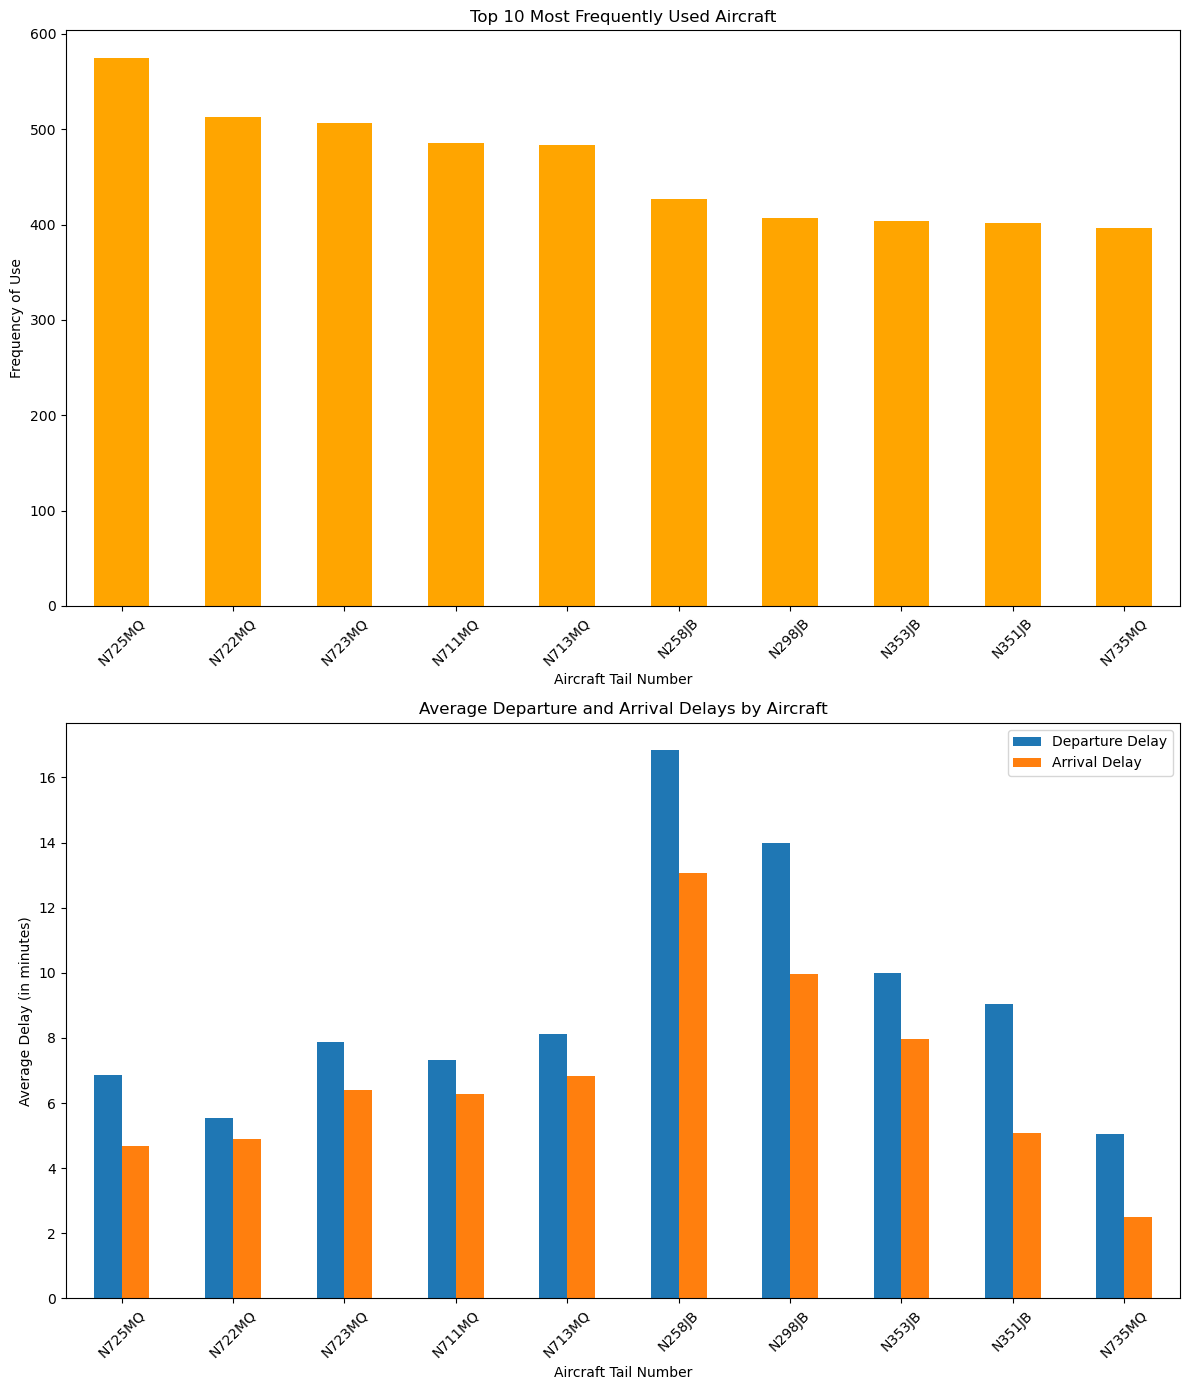

In [46]:
# Calculate the frequency of use of different aircraft (tailnum)
aircraft_frequency = flights_df['tailnum'].value_counts().head(10)

# Determine if specific aircraft are associated with delays
aircraft_delays = flights_df.groupby('tailnum').agg({'dep_delay': 'mean', 'arr_delay': 'mean'}).loc[aircraft_frequency.index]

# Set up the figure and axes for the visualizations
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14))

# Bar chart for the frequency of use of different aircraft
aircraft_frequency.plot(kind='bar', ax=ax1, color='orange')
ax1.set_title('Top 10 Most Frequently Used Aircraft')
ax1.set_xlabel('Aircraft Tail Number')
ax1.set_ylabel('Frequency of Use')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Grouped bar chart for the average departure and arrival delays associated with these aircraft
aircraft_delays.plot(kind='bar', ax=ax2)
ax2.set_title('Average Departure and Arrival Delays by Aircraft')
ax2.set_xlabel('Aircraft Tail Number')
ax2.set_ylabel('Average Delay (in minutes)')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.legend(["Departure Delay", "Arrival Delay"])

plt.tight_layout()
plt.show()


In [47]:
#N725MQ departure delay approx  6.87 minutes and arrival delay of approx 4.67 minutes.

#N722MQ departure delay approx 5.54 minutes and arrival delay of approx 4.91 minutes.

#N723MQ departure delay approx 7.89 minutes and arrival delay of approx 6.42 minutes.

# 4. Time Analysis



In [49]:
# Analyze data by year, month, and day
# Since the dataset appears to have data for only one year, we'll skip year analysis

# Monthly average delays
monthly_delays = flights_df.groupby('month').agg({'dep_delay': 'mean', 'arr_delay': 'mean'})

# Daily average delays
daily_delays = flights_df.groupby('day').agg({'dep_delay': 'mean', 'arr_delay': 'mean'})

monthly_delays, daily_delays


(       dep_delay  arr_delay
 month                      
 1      10.036665   6.129972
 2      10.816843   5.613019
 3      13.227076   5.807577
 4      13.938038  11.176063
 5      12.986859   3.521509
 6      20.846332  16.481330
 7      21.727787  16.711307
 8      12.611040   6.040652
 9       6.722476  -4.018364
 10      6.243988  -0.167063
 11      5.435362   0.461347
 12     16.576688  14.870355,
      dep_delay  arr_delay
 day                      
 1    14.172660   7.363696
 2    14.115552   6.768054
 3    10.811295   4.469919
 4     5.789651  -1.782720
 5     7.820824   0.492506
 6     6.990244  -1.748904
 7    14.339177   9.557723
 8    21.760773  19.072177
 9    14.644680   8.947512
 10   18.300505  14.736009
 11   15.791213  10.518073
 12   15.177765  11.138973
 13   13.562241   9.339157
 14    9.009513   3.185473
 15    6.890470  -1.348341
 16    8.745689   3.729968
 17   13.526196  10.078916
 18   14.857999  10.107717
 19   15.210662  10.192674
 20    8.558674   1.381356

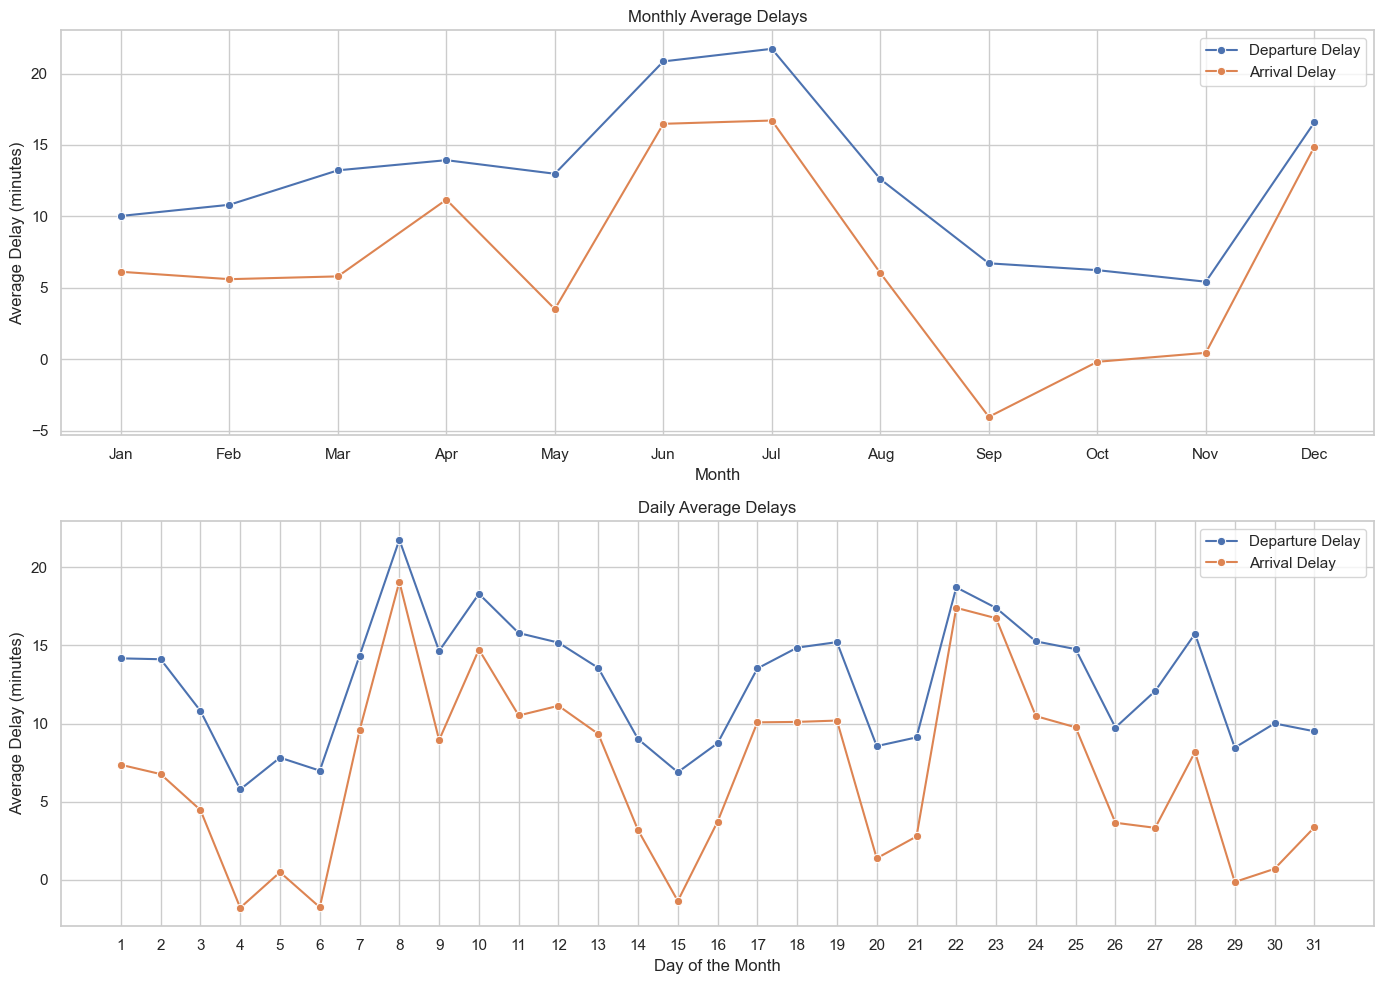

In [52]:
# Monthly average delays
monthly_delays = flights_df.groupby('month').agg({'dep_delay': 'mean', 'arr_delay': 'mean'}).reset_index()

# Daily average delays
daily_delays = flights_df.groupby('day').agg({'dep_delay': 'mean', 'arr_delay': 'mean'}).reset_index()

# Create the plots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=False)

# Monthly delays plot
sns.lineplot(x='month', y='dep_delay', data=monthly_delays, marker='o', ax=axes[0], label='Departure Delay')
sns.lineplot(x='month', y='arr_delay', data=monthly_delays, marker='o', ax=axes[0], label='Arrival Delay')
axes[0].set_title('Monthly Average Delays')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Delay (minutes)')
axes[0].set_xticks(range(1, 13))  # Assuming month is represented as integers 1 through 12
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[0].legend()

# Daily delays plot
sns.lineplot(x='day', y='dep_delay', data=daily_delays, marker='o', ax=axes[1], label='Departure Delay')
sns.lineplot(x='day', y='arr_delay', data=daily_delays, marker='o', ax=axes[1], label='Arrival Delay')
axes[1].set_title('Daily Average Delays')
axes[1].set_xlabel('Day of the Month')
axes[1].set_ylabel('Average Delay (minutes)')
axes[1].set_xticks(range(1, 32))  # Assuming day is represented as integers 1 through 31
axes[1].legend()

plt.tight_layout()
plt.show()


In [54]:
#Monthly Flight Insights:
#June & July: Highest avg. departure delays - approx. 20.85 & 21.73 mins. Arrival delays - 16.48 & 16.71 mins. Likely due to peak summer travel.

#September: Lowest avg. departure delay - approx. 6.72 mins. Flights arrive earlier on avg., with -4.02 mins. Arrival delay.

#Daily Departure Delays:
#8th: Highest avg. delay - 21.76 mins
#9th: Avg. delay - 14.64 mins
#10th: Avg. delay - 18.30 mins
#4th, 5th, 6th: Generally punctual, lower delays, occasional early arrivals


# 5. Carrier Performance 

In [56]:
# Calculate average departure and arrival delays for each carrier
carrier_delays = flights_df.groupby('name').agg({'dep_delay': 'mean', 'arr_delay': 'mean'})

# Determine the flight frequency for each carrier
carrier_frequency = flights_df['name'].value_counts()

# Calculate the on-time performance for each carrier
# Considering on-time as departure delay <= 0
on_time_flights = flights_df[flights_df['dep_delay'] <= 0].groupby('name').size()
total_flights = flights_df.groupby('name').size()
carrier_ontime_performance = (on_time_flights / total_flights) * 100

carrier_performance = pd.DataFrame({
    'Average Departure Delay': carrier_delays['dep_delay'],
    'Average Arrival Delay': carrier_delays['arr_delay'],
    'Flight Frequency': carrier_frequency,
    'On-Time Performance (%)': carrier_ontime_performance
}).sort_values(by='On-Time Performance (%)', ascending=False)

carrier_performance


,Average Departure Delay,Average Arrival Delay,Flight Frequency,On-Time Performance (%)
Hawaiian Airlines Inc.,4.900585,-6.915205,342,79.824561
US Airways Inc.,3.782418,2.129595,20536,73.519673
Alaska Airlines Inc.,5.804775,-9.930889,714,68.067227
Delta Air Lines Inc.,9.264505,1.644341,48110,67.595095
American Airlines Inc.,8.586016,0.364291,32729,67.007852
Envoy Air,10.552041,10.774733,26397,64.901315
SkyWest Airlines Inc.,12.586207,11.931034,32,62.500000
JetBlue Airways,13.022522,9.457973,54635,59.895671
Virgin America,12.869421,1.764464,5162,56.296009
Endeavor Air Inc.,16.725769,7.379669,18460,56.083424


In [61]:
#Carrier Performance Summary:

#Hawaiian Airlines Inc.: Top performer, 79.82% on-time departures, often arrives early.
#US Airways Inc.: Second-best, 73.52% on-time departures.
#Southwest Airlines Co.: Lowest on-time performance, only 45.01% on-time departures.
#Frontier Airlines Inc. has high departure and arrival delays compared to others.


# Heat Map

C:\Users\User\AppData\Local\Temp\ipykernel_12648\421741589.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  route_matrix = route_counts.pivot('origin', 'dest', 'counts')


ValueError: Unknown format code 'd' for object of type 'float'

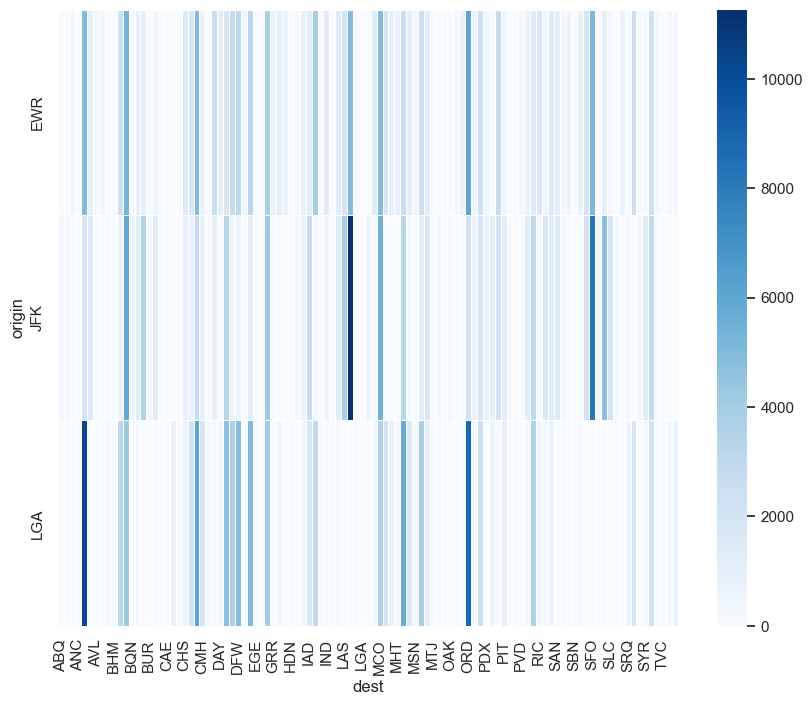

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
# data = pd.read_csv('path_to_your_csv_file.csv')  # Comment out this line since we're using 'flights_df'

# Create a new DataFrame for the route counts
route_counts = flights_df.groupby(['origin', 'dest']).size().reset_index(name='counts')

# Pivot the data to create a matrix form suitable for a heatmap
route_matrix = route_counts.pivot('origin', 'dest', 'counts')

# Fill NaN values with 0, since NaN indicates no flights between those airports
route_matrix = route_matrix.fillna(0)

# Create the heatmap
plt.figure(figsize=(10, 8))  # You can adjust the size to fit your needs
sns.heatmap(route_matrix, cmap="Blues", linewidths=.5, annot=True, fmt="d")

# Add labels and a title
plt.title('Number of Flights Between Airports')
plt.xlabel('Destination Airport')
plt.ylabel('Origin Airport')

# Show the heatmap
plt.show()
